# **xSoc Python Course** - Week 6

### *Data Processing*

🖋️ *Written by Alistair & Laura from the [Warwick AI](https://warwick.ai)*

---

## DataFrames and Indexing
In this section, we will cover the first step of any data processing task, importing the data. Previously in week 4 we looked at how to read in CSV data, however that method was quite cumbersome. Fortunately, Python has a library called `pandas` that can make importing and processing our data a lot easier. 

In [1]:
import pandas

Now we have imported pandas, we can load in our csv data into a `DataFrame` object. DataFrames are a way of storing various columns of data with a shared index. In this first example, we will create three rows of data and index each row with a letter.

In [2]:
row_1 = [1,9,7]
row_2 = [3,5,4]
row_3 = [6,8,2]
df = pandas.DataFrame([row_1,row_2,row_3], index=['A','B','C'])
df

,0,1,2
A,1,9,7
B,3,5,4
C,6,8,2


We can see that the DataFrame is output with the two rows, indexed by the letters we gave. If we change the index letters around, then we will create a different DataFrame with different indexing.

Now we have a DataFrame, we can access the data within it using indexing. Let's get the first column of data from the DataFrame.

In [3]:
df[1]

A    9
B    5
C    8
Name: 1, dtype: int64

Now let's get the first row of data (row 'A'). Note this time we need to use `.loc[]` as this indicates that we want to index using the row labels.

In [4]:
df.loc['A']

0    1
1    9
2    7
Name: A, dtype: int64

We can also index a row by the postition of the row by using `.iloc[]`, for example we can get the second row of data as follows. (Remember we need to use 1 as array indexing starts from 0)

In [5]:
df.iloc[1]

0    3
1    5
2    4
Name: B, dtype: int64

Lastly, we can also perform conditional indexing where we specific a condition for the indexing, for example lets return a DataFrame which only contains values >= 5.

In [6]:
df>=5

,0,1,2
A,False,True,True
B,False,True,False
C,True,True,False


In [7]:
df[df>5]

,0,1,2
A,NaN,9.0,7.0
B,NaN,NaN,NaN
C,6.0,8.0,NaN


Lastly, we can also change the index to something else if we want. For example, let's change from `A,B,C` to `X,Y,Z`.

In [8]:
new_index = ['X','Y','Z']
df['Index'] = new_index
df.set_index('Index')

,0,1,2
Index,,,
X,1,9,7
Y,3,5,4
Z,6,8,2


# Motivating Example

Now we have a basic idea of how dataframes work, in this section we will go through an example data processing task which will show various techniques we can use to analyse data and even create a machine learning model from it!

We will look at a dataset containing data about customers of an ecommerce platform. We will import this dataset into Python, clean it up, apply some processing to the dataset, visualise the dataset and analyse trends, and then we will predict the values of new data points based on it. This should hopefully mimic a real life data processing scenario and give you some idea of the process and techniques to follow and use.

## Importing Data

Now we now how to access data within a DataFrame, lets look at how to import external data into a DataFrame. In a lot of cases, the data we want to process will be stored as either `.csv` files or Excel Spreadsheets. Fortunately, pandas can work with both!

To import data from a CSV file, we can use the `.read_csv()` function as follows. In this instance we will import the `Ecommerce_Customers.csv` file.

In [9]:
ecommerce_data = pandas.read_csv('.\\Ecommerce_Customers.csv')
ecommerce_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


If you are working with a dataframe saved as an Excel spreadsheet, you can use the `.read_excel()` function to achieve the same effect. Note this function takes an argument `sheet_name` to indicate which sheet in the Excel workbook to import.

In [31]:
excel_dataframe = pandas.read_excel('.\\excel_data.xlsx',sheet_name='Sheet1')
excel_dataframe

,A,B,C,D
0,1,4,2,3
1,6,3,1,4
2,4,8,3,5


## Data Cleaning

Now that we have the data imported, we can start by cleaning the data to make it easier to work with. This is a common practice for data processing operations as sometimes the data you will be working with will have missing values or information that is harder to process and understand.

First we will use the `.describe()` function to understand different attributes of the data. Note this only produces data about the numerical data types in our data.

In [11]:
ecommerce_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,495.000000,495.000000,496.000000,495.000000,495.000000
mean,33.050008,12.051211,37.058278,3.523607,499.825650
std,0.996348,0.995019,1.009723,0.996120,79.340806
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.337444,11.387694,36.349257,2.926668,445.406013
50%,33.077731,11.982045,37.065856,3.532517,501.100245
75%,33.713317,12.755623,37.713378,4.120463,549.882368
max,36.139662,15.126994,40.005182,6.922689,765.518462


We can also use the `.info()` function to understand the data type for each column. It also gives us useful information about any missing data.

In [12]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 495 non-null    object 
 1   Address               496 non-null    object 
 2   Avatar                495 non-null    object 
 3   Avg. Session Length   495 non-null    float64
 4   Time on App           495 non-null    float64
 5   Time on Website       496 non-null    float64
 6   Length of Membership  495 non-null    float64
 7   Yearly Amount Spent   495 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Note that at the top of the output it says there are 500 entries, but only 495 non-null entries. This means each column has 5 values missing. 

Depending on the sort of data you are processing, there may be various ways to fix missing data, however in this case, we will simply remove any row that contains missing data.

To do this, we will use the `.dropna()` function with `inplace=True` so that we update the `ecommerce_data` dataframe rather than returning a new dataframe.

In [13]:
ecommerce_data.dropna(inplace=True)

If we rerun the functions from before, we can see that the missing values have been removed and the size of the dataframe has decreased accordingly.

In [14]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 462 non-null    object 
 1   Address               462 non-null    object 
 2   Avatar                462 non-null    object 
 3   Avg. Session Length   462 non-null    float64
 4   Time on App           462 non-null    float64
 5   Time on Website       462 non-null    float64
 6   Length of Membership  462 non-null    float64
 7   Yearly Amount Spent   462 non-null    float64
dtypes: float64(5), object(3)
memory usage: 32.5+ KB


In [15]:
ecommerce_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Data Processing
Now that we've removed any rows that have missing values, we can being processing our data further. In particular, we are going to look at the various features of our data and remove any features that aren't going to be useful for predicting the Yearly Amount Spent.

Firstly, we can remove the email and avatar columns, since it is not useful for predicting the Yearly Amount Spent. This is done using the `drop.()` function with `axis=1` and a list of column names we want to remove as parameters.

In [16]:
ecommerce_data.drop(['Email','Avatar'],axis=1,inplace=True)

In [17]:
ecommerce_data.head()

,Address,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",34.497268,12.655651,39.577668,4.082621,587.951054
1,"4547 Archer Common\nDiazchester, CA 06566-8576",31.926272,11.109461,37.268959,2.664034,392.204933
2,"24645 Valerie Unions Suite 582\nCobbborough, D...",33.000915,11.330278,37.110597,4.104543,487.547505
3,"1414 David Throughway\nPort Jason, OH 22070-1220",34.305557,13.717514,36.721283,3.120179,581.852344
4,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",33.330673,12.795189,37.536653,4.446308,599.406092


The next column we can process is Address. Currently, it shows each users exact addres which is too specific to be useful, however we could process this down to just a state, potentially allowing us to see if users from one state spend more money than users from another state.

We will do this in two parts, firstly we will create a function that allows us to get the state code from an address, then we will use the `.apply()` method to apply this processing function to each row of the DataFrame.

In [18]:
def address_process(address):
    address_list = address.split(' ')
    address_state = address_list[-2]
    return address_state

address_process(ecommerce_data['Address'][0])

'MI'

In [19]:
ecommerce_data['Address'] = ecommerce_data['Address'].apply(address_process)
ecommerce_data.head()

,Address,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,MI,34.497268,12.655651,39.577668,4.082621,587.951054
1,CA,31.926272,11.109461,37.268959,2.664034,392.204933
2,DC,33.000915,11.330278,37.110597,4.104543,487.547505
3,OH,34.305557,13.717514,36.721283,3.120179,581.852344
4,PR,33.330673,12.795189,37.536653,4.446308,599.406092


## Data Visualisation
Now we have processed our data, we will create some graphs showing the different relationships between the various features in our data. This will allow us to see which features affect the yearly amount spent the most.

To do this, we will use the `matplotlib` library which allows us to create graphs in a similar manner to that of `MATLAB`. First, lets create a graph of the Avg. Session Length against Yearly Amount Spent.

We will use the `.scatter()` function to create this, which will create a scatter plot of the data. Matplotlib has various different plot types, more than we can explore in this session, but you can find out more here: [https://matplotlib.org/stable/plot_types/index.html](https://matplotlib.org/stable/plot_types/index.html)

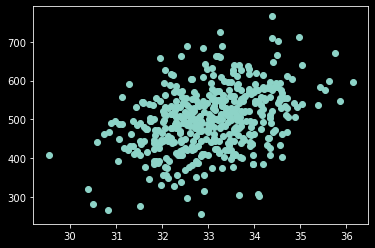

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

plt.scatter(ecommerce_data['Avg. Session Length'],ecommerce_data['Yearly Amount Spent'])
plt.show()

From this, we can see that the relationship between Average Session Length and Yearly Amount Spent is quite chaotic, but we can try the other features and see if they have a more clear relationship with the Average Session Length.

In order to make multiple plots, we will use the `plt.subplots()` function which will determine how many graphs we want to draw. `plt.subplots()` primarily takes two arguments, `nrows` and `ncols`, which determine how the graphs are arranged. In this instance, we will set both to 2 which will create 4 graphs, two on the top row and two on the bottom row. You may want to experiment with `plt.subplots(4,1)` or `plt.subplots(1,4)` to see how this changes the output.

To plot data on each graph, we use the `axs` variable created by `plt.subplots()`. To specify a graph, we pass the row and column of the graph we want to plot, e.g. for the top-left graph we use `axs[0,0]`. The first index corresponds to the row, and the second corresponds to the column (remember list indexing starts at 0). Similar to before, we use the `scatter()` function to plot the data.

Lastly, we can also set a title for each axis using the `set_title()` function.

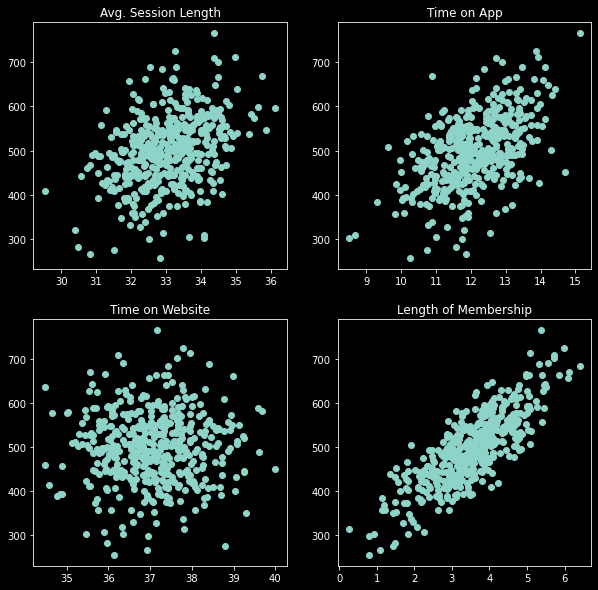

In [21]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
axs[0, 0].scatter(ecommerce_data['Avg. Session Length'], ecommerce_data['Yearly Amount Spent'])
axs[0, 0].set_title('Avg. Session Length')
axs[0, 1].scatter(ecommerce_data['Time on App'], ecommerce_data['Yearly Amount Spent'],)
axs[0, 1].set_title('Time on App')
axs[1, 0].scatter(ecommerce_data['Time on Website'], ecommerce_data['Yearly Amount Spent'])
axs[1, 0].set_title('Time on Website')
axs[1, 1].scatter(ecommerce_data['Length of Membership'], ecommerce_data['Yearly Amount Spent'])
axs[1, 1].set_title('Length of Membership')

plt.show()

From the above plots, we can see that length of membership seems to have the strongest correlation with the yearly amount spent, as the graph appears to take the form of a straight line rather than a blob of various points.

We can also look at the address and see if that has any correlation with the yearly amount spent. For this, we will want to use a bar chart. To create this, we can use a similar method as above where we create a figure, this time we will specify the size of the figure by passing a size list (`[20,5]`) into the `.figure()` function, which specifies the size of the figure as 20 wide and 5 tall. We then create an axis by adding a subplot to the figure, and create the bar chart plot using the `.bar()` function with the data.

Due to there being lots of states, to make sure the state labels on the x-axis don't overlap, you can use the `plt.setp()` function which allows us to set the fontsize and rotation of the text passed as a parameter, in this case `ax.get_xticklabels()`.

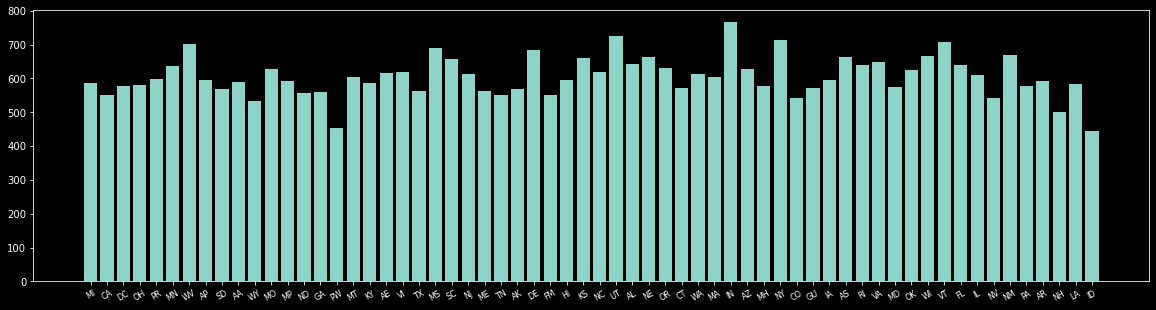

In [22]:
fig = plt.figure(1, [20,5])
ax = fig.add_subplot(1,1,1)
ax.bar(ecommerce_data['Address'],ecommerce_data['Yearly Amount Spent'])
plt.setp(ax.get_xticklabels(),fontsize=8, rotation=30)
plt.show()

From that chart, we can see that the yearly amount spent is roughly equivalent across all states, however there are a couple of outliers that may need to be investigated further.

## Data Prediction

As a bonus, we are now going to run some predictions based on the ecommerce data. To do this, we will use linear regression, which is a common machine learning technique for this sort of purpose. We won't go through everything in detail, however you should be able to get a decent intuition on how we have programmed this. Hopefully this will demonstrate that with the skills you have developed over the last few weeks, some really powerful functionality is at your fingertips and with a bit more practice you can become a Python pro!

To develop predictions on our data, we need to train a model on the features of our data to predict the target value. In this case, the features are "Avg. Session Length", "Time on App", "Time on Website" and "Length of Membership" and the value we are predicting is the "Yearly Amount Spent".

First we will separate these features and values into specific variables.

In [24]:
features = ecommerce_data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
values = ecommerce_data["Yearly Amount Spent"]

Now we have the features and values, we will train our model. Instead of implementing our own code for linear regression, we can use a library called `scikitlearn` which has many of these models already implemented. In this case, we will import the `LinearRegression` model from the library.

Once this is imported, we can create an instance of the model using `LinearRegression()` and then train it by calling `.fit()` with the features and values datasets passed as parameters.

In [26]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(features, values)

LinearRegression()

Now that our model is trained, we can generate predictions using the `.predictions()` function on the variable containing our Linear Regression model. To see how good our predictions are (how well the model has learnt), we can plot a scatter graph of our predicitions against the true values. If the predictions are good, we would expect this graph to show strong positive correlation (i.e. be close to a straight line along y=x)

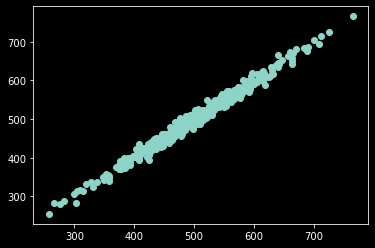

In [27]:
predictions = lm.predict(features)
plt.scatter(x=values,y=predictions)

We can see our predictions are fairly good as the points form a tight line!

In an actual data project, you might want to spend more time separating data into train and test sets and use a specific mathematical function to guage success of the model, but this goes to show that with a basic understanding of Python, complicated tasks such as creating machine learning models can be very simple!

Lastly, lets look at the coeffients of the model (what the model has learnt) and see if those help us understand our initial data better. This is done by getting the `coef_` value from the linear regression model. To make this nice to look at, we will place these values in a DataFrame.

In [30]:
cdf = pandas.DataFrame(lm.coef_,features.columns,columns = ['Coeff'])
cdf

,Coeff
Avg. Session Length,25.769427
Time on App,38.648397
Time on Website,0.445362
Length of Membership,61.623077


Each coefficient tells us the effect that feature has on the yearly amount spent (for example, a 1 unit increase in Avg. Session Length increases the Yearly Amount Spent by 25.769427). From this, we can see that Length of Membership has the greatest effect on Yearly Amount Spent (as we might expect from the graphs we created earlier), followed by Time on App, then Avg. Session Length, then last Time on Website.

If this were a proper data project, we might suggest to the company that they should try to develop the website further to help increase the Yearly Amount Spent from the Time on Website, or we may suggest they forget about the website and focus on developing the app as it currently has a greater impact on the Yearly Amount Spent. Very valuable insights from a fairly small sample of data!

🖋️ ***This week was written by Alistair and Laura from [Warwick AI](https://warwick.ai)***

---

# Week 6 Exercises

For these exercises, we will use the Ecommerce_Customers.csv file that we have been using for the majority of the notebook. This can be downloaded from the Google Drive along with the notebook itself. Make sure the notebook and the data are in the same folder on your computer.

## Exercise 1

This exercise will focus on importing the data and using DataFrame indexing to retrieve different aspects of the data.

### Exercise 1.1

Import the Ecommerce_Customers.csv file into a pandas DataFrame and display it using the `.head()` function.

In [32]:
ecommerce_data = pandas.read_csv('.\\Ecommerce_Customers.csv')
ecommerce_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Exercise 1.2

Use DataFrame indexing to retrieve the list of emails in the DataFrame. Store this in a variable and print the variable.

In [37]:
emails = ecommerce_data['Email']
print(emails)

0          mstephenson@fernandez.com
1                  hduke@hotmail.com
2                   pallen@yahoo.com
3            riverarebecca@gmail.com
4      mstephens@davidson-herman.com
                   ...              
495     lewisjessica@craig-evans.com
496              katrina56@gmail.com
497               dale88@hotmail.com
498              cwilson@hotmail.com
499        hannahwilson@davidson.com
Name: Email, Length: 500, dtype: object


### Exercise 1.3

Use DataFrame indexing to get a list of emails from rows where the Yearly Amount Spent is greater than 500. Again, store this in a variable and print the variable out.

In [39]:
emails_500 = ecommerce_data[ecommerce_data['Yearly Amount Spent'] > 500]['Email']
print(emails_500)

0          mstephenson@fernandez.com
3            riverarebecca@gmail.com
4      mstephens@davidson-herman.com
5             alvareznancy@lucas.biz
6              katherine20@yahoo.com
                   ...              
493              nathan84@lowery.net
494            kellydeborah@chan.biz
495     lewisjessica@craig-evans.com
496              katrina56@gmail.com
497               dale88@hotmail.com
Name: Email, Length: 248, dtype: object


### Exercise 1.4

Using DataFrame indexing to get a DataFrame of all the rows where the Avatar is CadetBlue and the Length of Membership is greater than 3.5. Store this DataFrame in a new variable and use `.head()` to display it (it should be fairly short).

Note, this website may help: https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/

In [52]:
blueand3dot5 = ecommerce_data[(ecommerce_data['Avatar']=="CadetBlue") & (ecommerce_data['Length of Membership'] > 3.5)]
blueand3dot5.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
164,twilliams@gibbs.net,Unit 6678 Box 6628\nDPO AP 44369,CadetBlue,33.154255,11.795887,37.658617,4.520353,550.047581
437,alicia28@fuller.com,"8055 Robinson Brooks Apt. 657\nWalterview, KY ...",CadetBlue,31.967321,11.481587,39.240965,3.532517,445.749841


## Exercise 2

This exercise will focus on processing data in the DataFrame using the `.apply()` function.

### Exercise 2.1

Suppose the Yearly Amount Spent is in U.S Dollars and we want to convert it to GBP. Create a function to do the conversion from dollars to pounds and then apply it to the Yearly Amount Spent to get the Yearly Amount Spent in pounds. (Assume the exchange rate is 1 dollar = 0.81 pounds). Get the head of the dataframe to make sure the Yearly Amount Spent has changed.

In [53]:
def conversion(dollars):
    pounds = 0.81*dollars
    return pounds

ecommerce_data['Yearly Amount Spent'] = ecommerce_data['Yearly Amount Spent'].apply(conversion)
ecommerce_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,476.240354
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,317.685996
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,394.913479
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,471.300399
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,485.518935


### Exercise 2.2

Suppose we want to look at a new feature "Time on Platform" which is the Time on App + Time on Website. Either create a function or use a `lambda` function with the `.apply()` method to create a new DataFrame column Time on Platform.

Hint: the first example on this page demonstrates one way to achieve this https://www.geeksforgeeks.org/apply-function-to-every-row-in-a-pandas-dataframe/

In [55]:
ecommerce_data['Time on Platform'] = ecommerce_data.apply(lambda row: row['Time on App']+ row['Time on Website'], axis=1)
ecommerce_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Time on Platform
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,476.240354,52.233319
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,317.685996,48.378420
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,394.913479,48.440875
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,471.300399,50.438796
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,485.518935,50.331842


## Exercise 3

This final exercise will look at data visualisation. Produce a scatter graph of the new Time on Platform column created in the last exercise against the Yearly Amount Spent. Feel free to look back at the examples earlier in the notebook to help you.

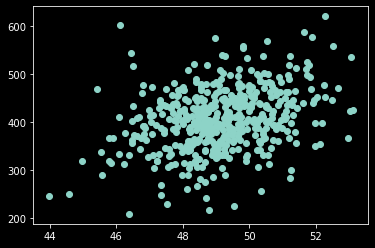

In [56]:
plt.scatter(ecommerce_data['Time on Platform'],ecommerce_data['Yearly Amount Spent'])
plt.show()

---

#### **Congrats on making it to the end of the Cross-Society Python Course!**

Thanks so much for taking part, and we hope you found it useful!

---